<a href="https://colab.research.google.com/github/umangraval/DSC-2CC-Projects/blob/master/Derain_image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.16.1

In [2]:
%tensorflow_version 1.1.2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.1.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
import numpy as np
import datetime
import time
import os
import matplotlib.pyplot as plt
import functions

In [19]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model_path = 'model/model.ckpt'



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
batch_size = 1
epochs=1000

lambda_a = 3                          #GAN coefficient
lambda_p = 0.015                      #vgg coefficient
lambda_e = 15                         #raw coefficient

discrminator_learning_rate = 0.002
generator_learning_rate = 0.0002
beta1 = 0.5

label_switch_frequency = 10

In [7]:
#set up the learning policy
#global_step = tf.Variable(0, trainable = False)
#learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 1 * (700/5), 0.995, staircase=False)

#set up the placeholder

batch_sizes = tf.placeholder(tf.int32)
derain_placeholder = tf.placeholder(tf.float32, shape=(batch_size,224,224,3))
rain_placeholder = tf.placeholder(tf.float32, shape=(batch_size,224,224,3))


d_watch_placeholder = tf.placeholder(tf.float32)
g_watch_placeholder = tf.placeholder(tf.float32)


img_ground_truth_for_vgg16 = tf.placeholder(tf.float32, shape=(batch_size,224,224,3))


D_Loss_placeholder = tf.placeholder(tf.float32)
G_Loss_placeholder = tf.placeholder(tf.float32)

In [8]:
#Generator
Gz = functions.generator(rain_placeholder,batch_size)

#Discriminator

fake = tf.concat([Gz, rain_placeholder], 3)
real = tf.concat([derain_placeholder, rain_placeholder], 3)

Dg = functions.discriminator(fake)            #for generated image and groumd truth
Dg_truth = functions.discriminator(real)      #for derain image and groumd truth

#VGG19
vgg19_features_output_gen = functions.vgg_19(Gz)
vgg19_features_gt = functions.vgg_19(derain_placeholder)


W0429 07:01:39.544245 139727821232000 module_wrapper.py:139] From functions.py:23: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0429 07:01:39.548141 139727821232000 module_wrapper.py:139] From functions.py:23: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0429 07:01:39.551744 139727821232000 module_wrapper.py:139] From functions.py:29: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0429 07:01:39.839260 139727821232000 deprecation.py:323] From functions.py:73: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
W0429 07:01:39.841073 139727821232000 deprecation.py:323] From /

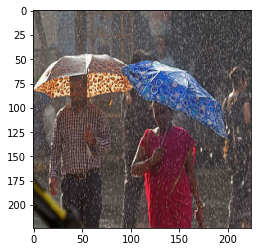

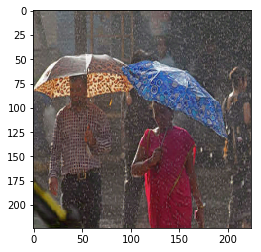

In [23]:
''' GIVE TEST IMAGE PATH BELOW'''


test_data_path = 'images/3.jpg'


saver = tf.train.Saver()
# image = functions.load_img(test_data_path)
image = functions.load_img2(test_data_path)


with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())
#   saver = tf.train.import_meta_graph(model_path+'.meta')
  saver.restore(sess, model_path)

  imgs = sess.run(image)   
  # go = imgs[:,224:,:]
  go = imgs[:,:,:]
  plt.figure(1)
  plt.imshow(go)

  go = np.expand_dims(go, axis = 0)  
#   go.shape

  result = sess.run(Gz, {rain_placeholder: go})
#   result.shape
  plt.figure(2)
  plt.imshow(result[0,:,:,:])


#   plt.show()